# BUSINESS ANALYSIS WITH EDA & STATISTIC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("marketing_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

**COLUMNS MEANING**

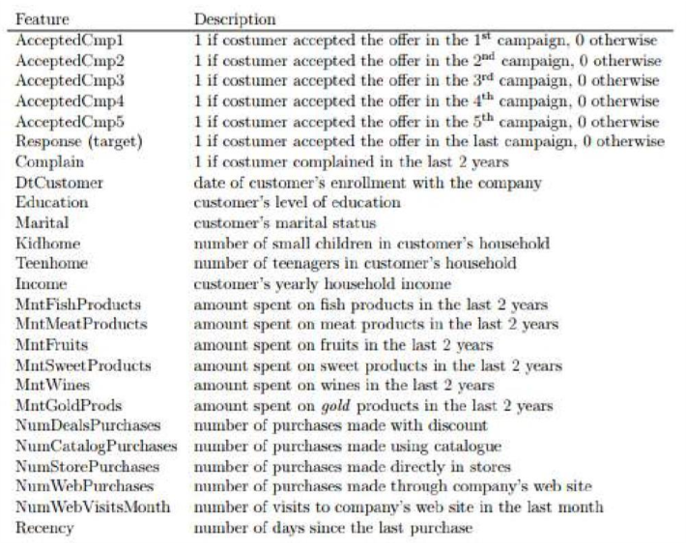

## FEATURE ENGINEERING

**drop duplicate value**

In [5]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


**fill missing value**

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

**converting string to float**

In [9]:
df["Income"] = df[' Income ']

In [10]:
df.drop(columns=' Income ',axis=1,inplace=True)

In [11]:
df["Income"] = df["Income"].str.replace("$","")
df["Income"] = df["Income"].str.replace(",","")

In [12]:
df["Income"] = df["Income"].str.rstrip()

In [13]:
df["Income"]

0       84835.00
1       57091.00
2       67267.00
3       32474.00
4       21474.00
          ...   
2235    66476.00
2236    31056.00
2237    46310.00
2238    65819.00
2239    94871.00
Name: Income, Length: 2240, dtype: object

In [14]:
df['Income'] = pd.to_numeric(df['Income'])

In [15]:
df["Income"]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [16]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [17]:
print(df["Income"].count())
print(df["Income"].isnull().sum())

2216
24


In [18]:
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,1826,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,...,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,...,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,0,1,5/13/14,0,134,11,...,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,1,1,5/11/14,0,10,0,...,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,1,0,4/8/14,0,6,16,...,7,1,0,0,0,0,1,0,SP,21474.0


In [20]:
df['Month'] = pd.to_datetime(df['Dt_Customer']).dt.month
df['Year'] = pd.to_datetime(df['Dt_Customer']).dt.year
df['Day'] = pd.to_datetime(df['Dt_Customer']).dt.day

In [21]:
df.drop(columns="ID",axis=1,inplace=True)

In [22]:
df['Day_of_Week'] = pd.to_datetime(df['Dt_Customer']).dt.dayofweek

In [23]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

df = df.replace({"Day_of_Week": days})

In [24]:
import calendar

df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [25]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Month,Year,Day,Day_of_Week
0,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,379,...,0,0,1,0,SP,84835.0,Jun,2014,16,Mon
1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,...,0,1,1,0,CA,57091.0,Jun,2014,15,Sun
2,1958,Graduation,Married,0,1,5/13/14,0,134,11,59,...,0,0,0,0,US,67267.0,May,2014,13,Tue
3,1967,Graduation,Together,1,1,5/11/14,0,10,0,1,...,0,0,0,0,AUS,32474.0,May,2014,11,Sun
4,1989,Graduation,Single,1,0,4/8/14,0,6,16,24,...,0,0,1,0,SP,21474.0,Apr,2014,8,Tue


In [26]:
df.drop(columns="Dt_Customer",axis=1,inplace=True)

**clean data**

In [27]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Month,Year,Day,Day_of_Week
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,0,1,0,SP,84835.0,Jun,2014,16,Mon
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,0,1,1,0,CA,57091.0,Jun,2014,15,Sun
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,0,US,67267.0,May,2014,13,Tue
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,0,AUS,32474.0,May,2014,11,Sun
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,0,1,0,SP,21474.0,Apr,2014,8,Tue


## Exploratory Data Analysis & Data Visualization

In [28]:
colors = sns.color_palette("pastel")
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

**Response**

In [29]:
df["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

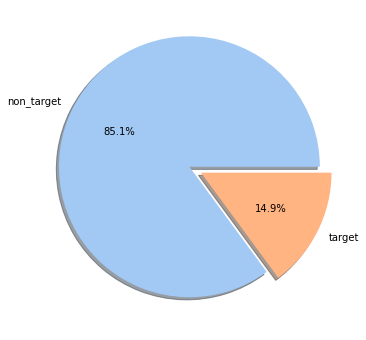

In [30]:
value = df["Response"].value_counts()
response = ["non_target","target"]

plt.figure(figsize=(12,6))
explode = (0.05,0.05)
plt.pie(x=value,labels=response,autopct="%0.1f%%",colors=colors, explode=explode,shadow=True);

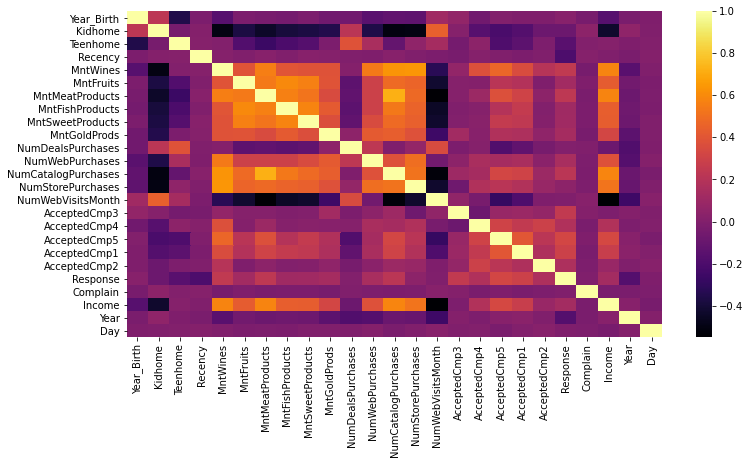

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap="inferno");

**Year Birth**

In [32]:
df["Year_Birth"].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [33]:
df["Year_Birth"].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900], dtype=int64)

In [34]:
from datetime import date

In [35]:
today = date.today()

In [36]:
df["Year_Birth"].abs()
df["Age"] =  today.year - df["Year_Birth"]
df["Age"].abs()

0       51
1       60
2       63
3       54
4       32
        ..
2235    45
2236    44
2237    45
2238    43
2239    52
Name: Age, Length: 2240, dtype: int64

In [37]:
df["Age"].unique()

array([ 51,  60,  63,  54,  32,  67,  74,  42,  62,  40,  52,  44,  61,
        55,  45,  56,  65,  46,  50,  35,  49,  47,  31,  34,  37,  53,
        66,  38,  48,  43,  69,  59,  57,  39,  58,  64,  41,  76,  72,
        73,  68,  75,  36,  29,  77,  70,  33,  71,  27,  28,  30, 128,
        25,  26, 122,  78,  80,  81, 121], dtype=int64)

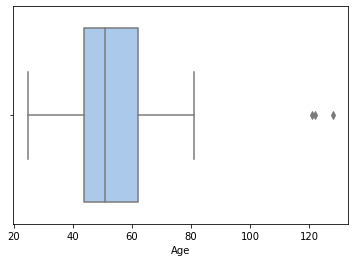

In [38]:
sns.boxplot(x='Age',data=df,palette=colors);

In [39]:
df.index[df["Age"]>81]
df.drop([513,827,2233],axis=0,inplace=True) 

# remove age outliers

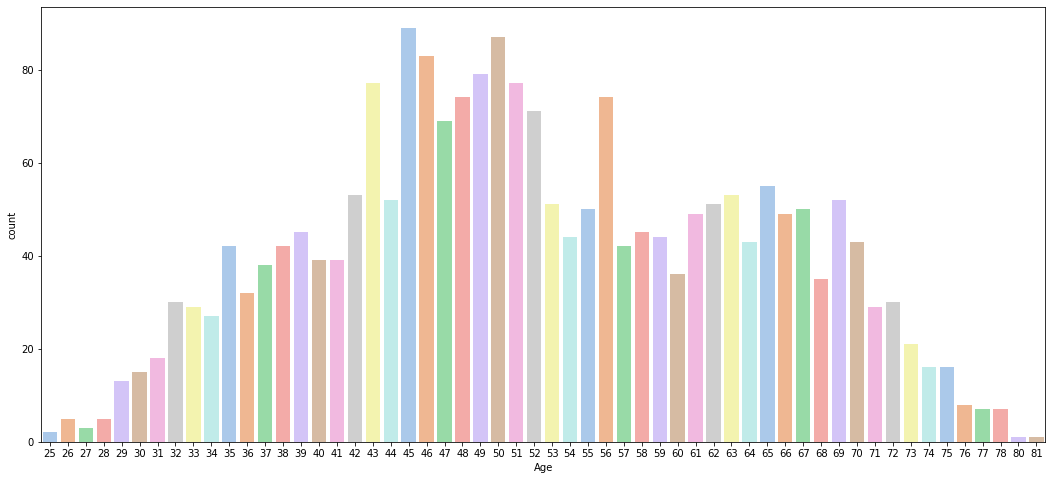

In [40]:
plt.figure(figsize=(18,8))
sns.countplot(x='Age',data=df,palette=colors);

In [41]:
df["Age"] = df["Age"].sort_values()

In [42]:
df["Age"].sort_values()

562     25
1824    25
964     26
697     26
1467    26
        ..
1209    78
1208    78
1202    78
1740    80
2171    81
Name: Age, Length: 2237, dtype: int64

In [43]:
m = {}

for i in df['Age']:
    
    if i >= 20 and i < 29:
        m.setdefault(i,'20-29')
    
    elif i >= 30 and i < 39:
        m.setdefault(i,'30-39')
    
    elif i >= 40 and i < 49:
        m.setdefault(i,'40-49')
    
    elif i >= 50 and i < 59:
        m.setdefault(i,'50-59')
        
    elif i >= 60 and i < 69:
        m.setdefault(i,'60-69')
    
    elif i >= 70 and i < 79:
        m.setdefault(i,'70-79')
        
    else:
        m.setdefault(i,'80-89')

df['Age_Range'] = df['Age'].map(m)

In [44]:
df.drop(["Year_Birth","Age"],axis=1,inplace=True)

In [45]:
orders = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']

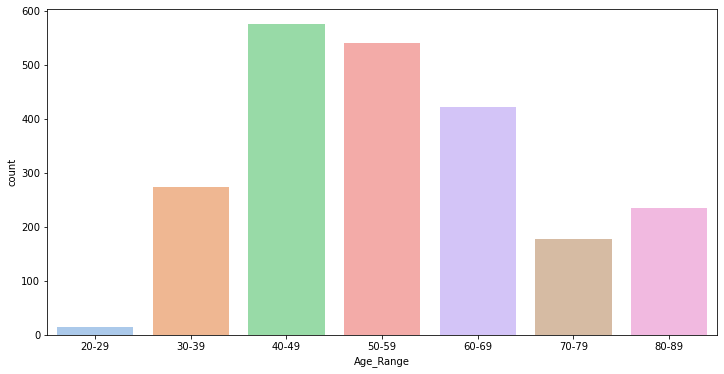

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age_Range",data=df,order=orders,palette=colors);

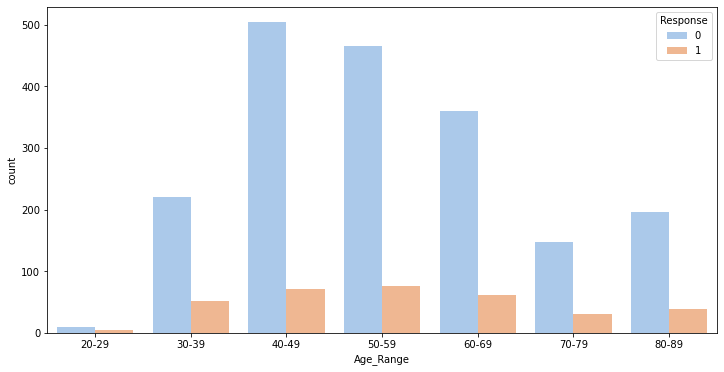

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age_Range",data=df,order=orders,hue='Response',palette=colors);

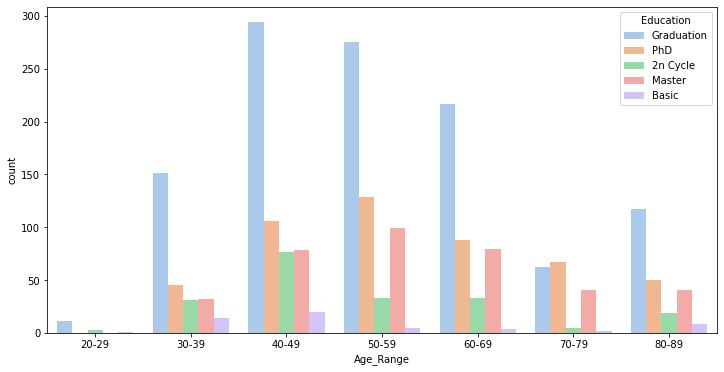

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age_Range",data=df,order=orders,hue='Education',palette=colors);

In [49]:
df1 = df.groupby('Age_Range')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

<Figure size 864x432 with 0 Axes>

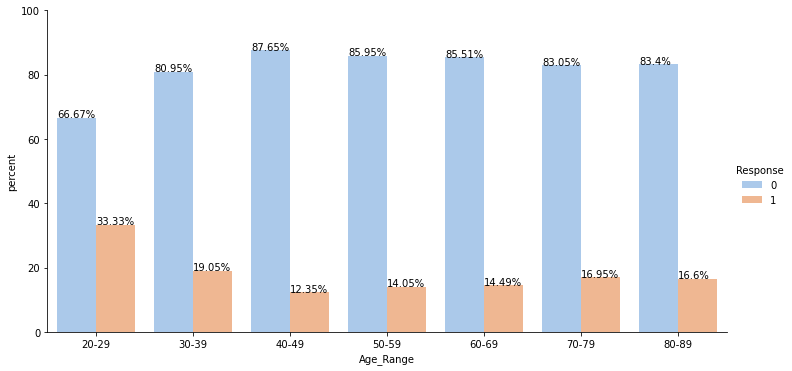

In [50]:
plt.figure(figsize=(12,6))
g = sns.catplot(x='Age_Range',y='percent',hue='Response',kind='bar',data=df1,aspect=2,order=orders,palette=colors);
g.ax.set_ylim(0,100);

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

**Education**

In [51]:
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

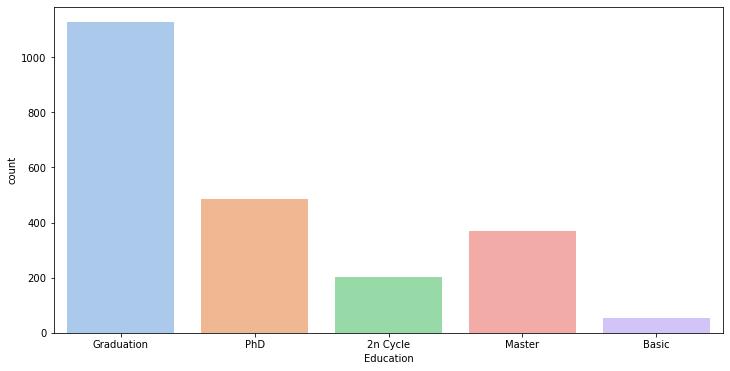

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education',data=df,palette=colors);

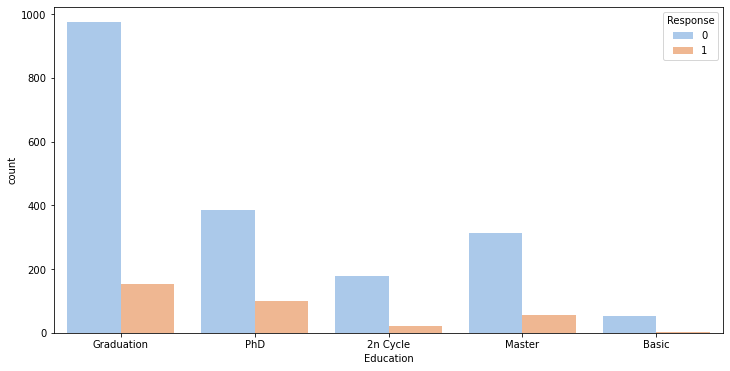

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education',data=df,hue='Response',palette=colors);

**Marital Status**

In [54]:
df["Marital_Status"].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [55]:
print(df.index[df['Marital_Status'] == "Alone"])
print(df.index[df['Marital_Status'] == "Absurd"])
print(df.index[df['Marital_Status'] == "YOLO"])

Int64Index([286, 838, 959], dtype='int64')
Int64Index([1068, 1339], dtype='int64')
Int64Index([103, 104], dtype='int64')


In [56]:
df.drop([286,838,959,1068,1339,103,104],axis=0,inplace=True)

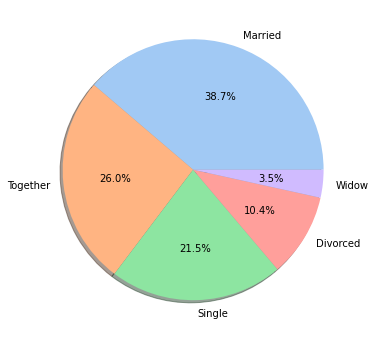

In [57]:
value = df["Marital_Status"].value_counts()
response = ["Married","Together","Single","Divorced","Widow"]

plt.figure(figsize=(12,6))
plt.pie(x=value,labels=response,autopct="%0.1f%%",colors=colors,shadow=True);

In [58]:
pd.crosstab(df['Response'],df['Marital_Status'])

Marital_Status,Divorced,Married,Single,Together,Widow
Response,,,,,
0,183,766,373,519,58
1,48,98,106,60,19


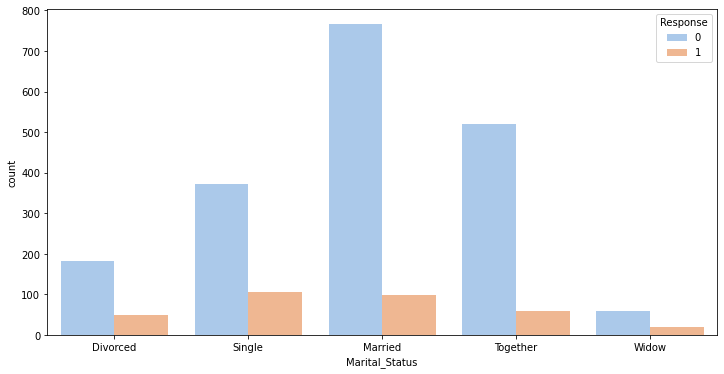

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='Marital_Status',data=df,hue='Response',palette=colors);

**Country**

In [60]:
df["Country"].value_counts()

SP     1094
SA      336
CA      263
AUS     159
IND     146
GER     120
US      109
ME        3
Name: Country, dtype: int64

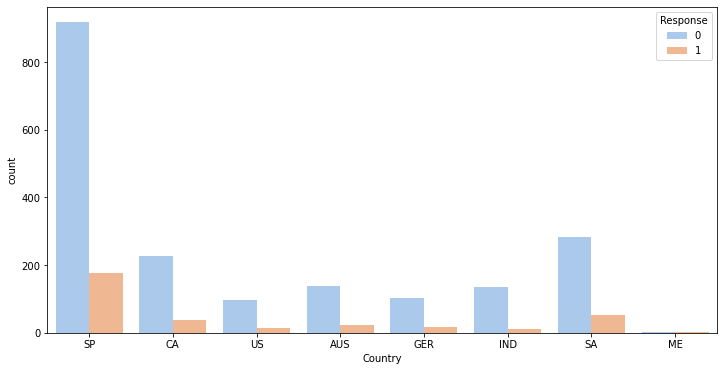

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country',data=df,hue='Response',palette=colors);

**Income**

In [62]:
df[df["Income"] > 600000]
df.drop([527],axis=0,inplace=True)

In [63]:
df["Income"].describe()

count      2229.000000
mean      51957.766277
std       21428.100551
min        1730.000000
25%       35441.000000
50%       51717.000000
75%       68281.000000
max      162397.000000
Name: Income, dtype: float64

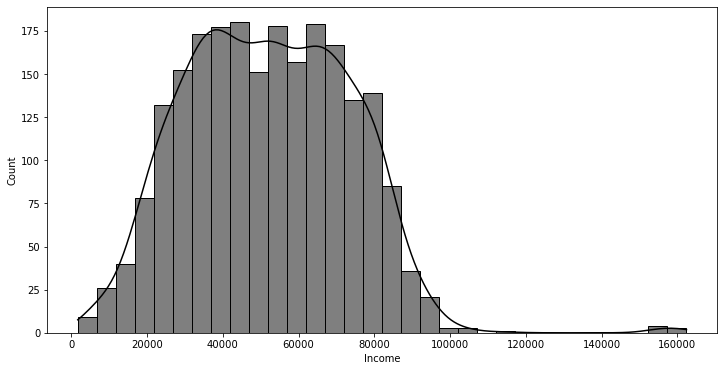

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(x="Income",data=df,kde=True,color='black');

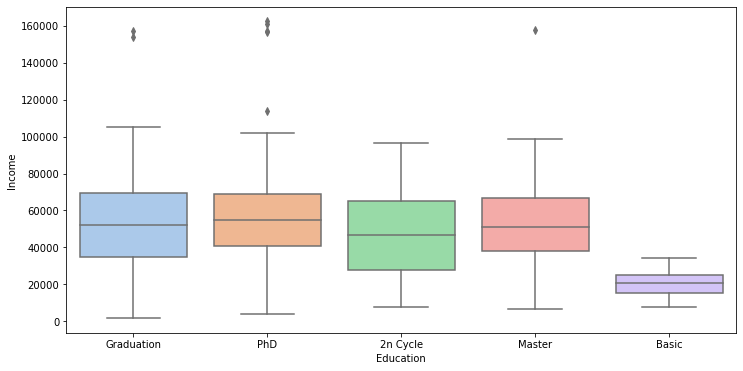

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education',y='Income',data=df,palette=colors);

<Figure size 1440x864 with 0 Axes>

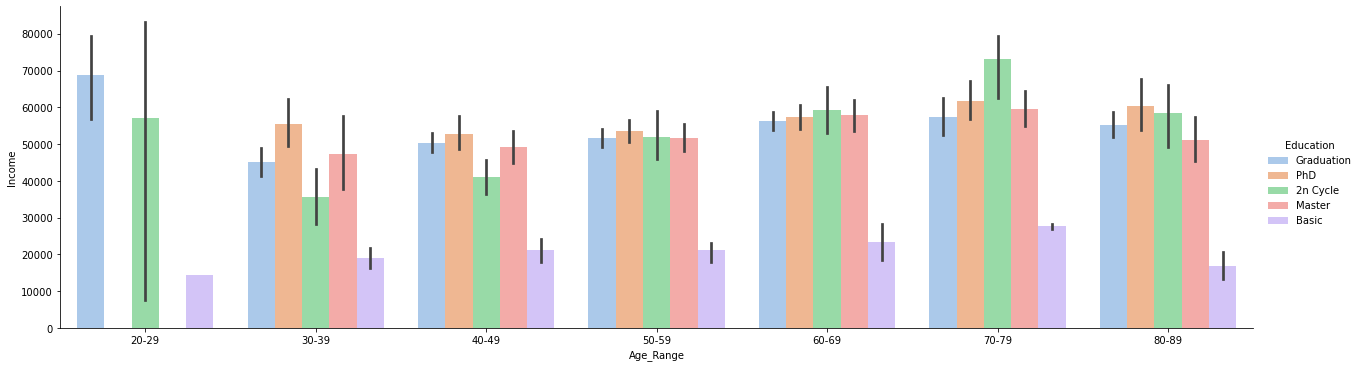

In [66]:
orders = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']

plt.figure(figsize=(20,12))
sns.catplot(x='Age_Range',y='Income',data=df,hue='Education',kind='bar',aspect=3.5,order=orders,palette=colors);

**Education**

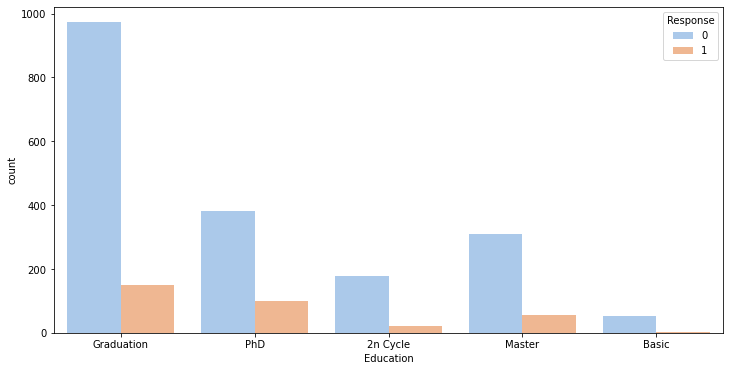

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education',data=df,hue='Response',palette=colors);

In [68]:
df1 = df.groupby('Education')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

<Figure size 864x432 with 0 Axes>

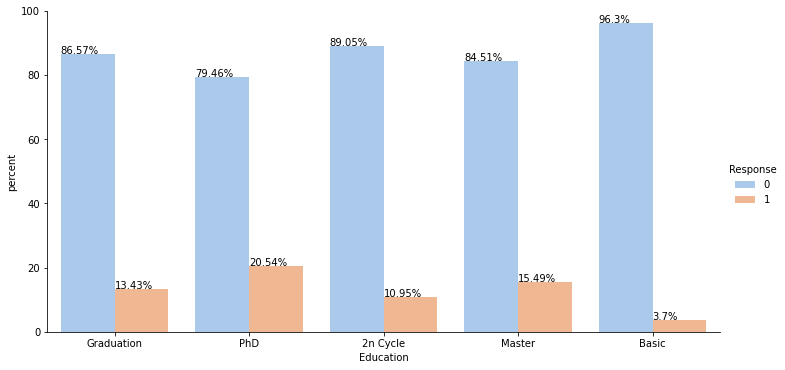

In [69]:
orders = ['Graduation','PhD','2n Cycle','Master','Basic']

plt.figure(figsize=(12,6))
g = sns.catplot(x='Education',y='percent',hue='Response',kind='bar',data=df1,aspect=2,order=orders,palette=colors)
g.ax.set_ylim(0,100);

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
# PhD and Master highest positive response

**Country**

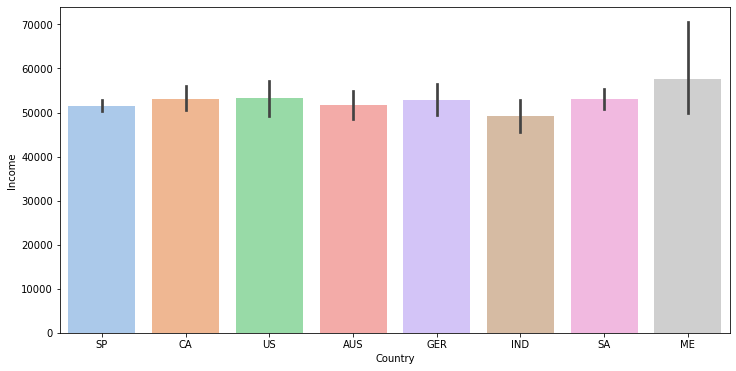

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country',y="Income",data=df,palette=colors);

**Month**

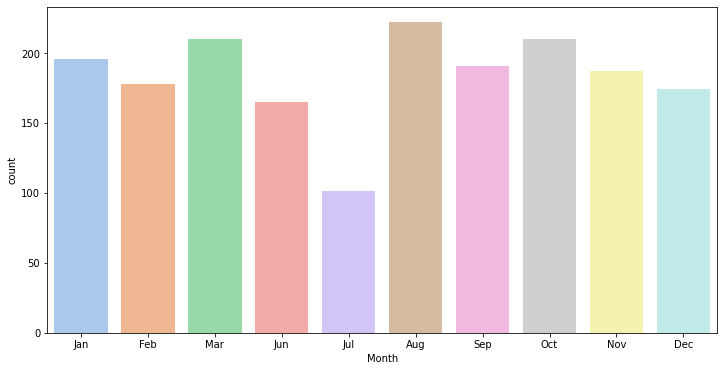

In [71]:
orders = ["Jan","Feb","Mar","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=df,order=orders,palette=colors);

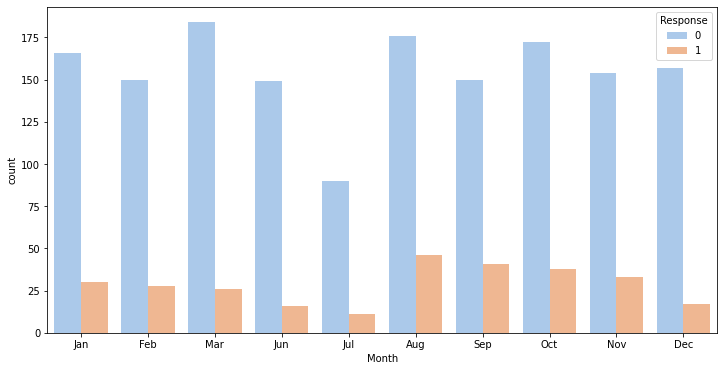

In [72]:
orders = ["Jan","Feb","Mar","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=df,order=orders,hue='Response',palette=colors);

**Day of Week**

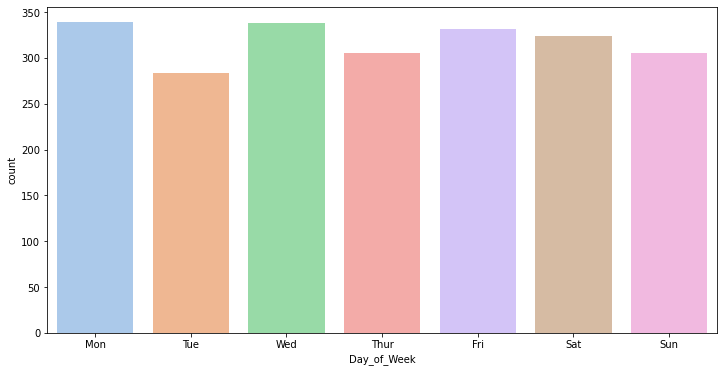

In [73]:
orders = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
plt.figure(figsize=(12,6))
sns.countplot(x="Day_of_Week",data=df,order=orders,palette=colors);

**Kidhome & Teenhome**

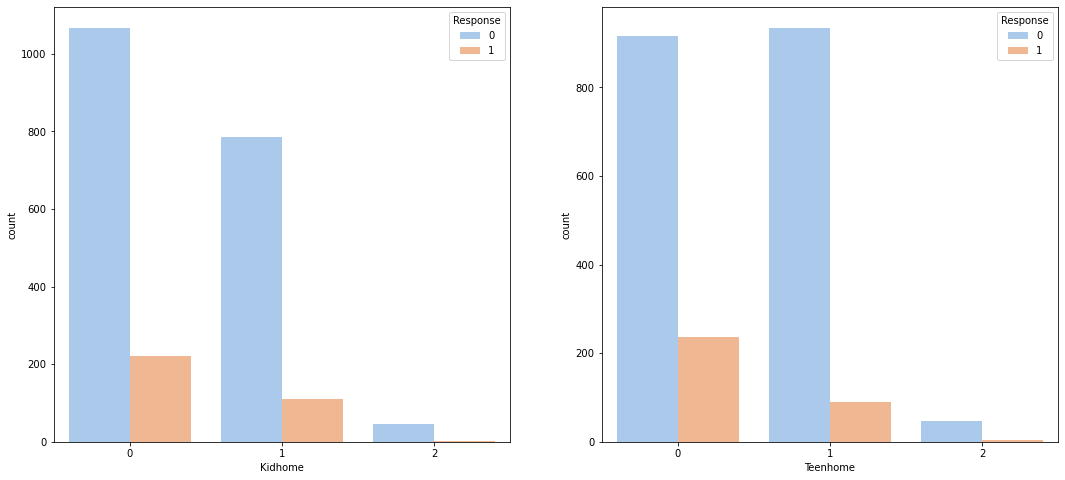

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))
ax = sns.countplot(x='Kidhome',data=df,ax = axes[0],hue='Response',palette=colors)
ax = sns.countplot(x='Teenhome',data=df,ax = axes[1],hue="Response",palette=colors);

**Total Spending Value**

In [75]:
df1 = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']]
df1.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34


In [76]:
df1.sum()

MntWines            678120
MntFruits            58566
MntMeatProducts     372571
MntFishProducts      83489
MntSweetProducts     60464
MntGoldProds         97773
dtype: int64

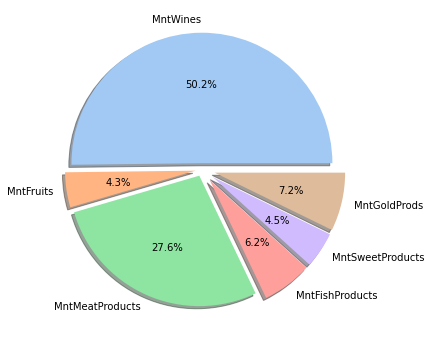

In [77]:
value = df1.sum()
response = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(12,6))
explode = (0.05,0.05,0.05,0.1,0.1,0.1)
plt.pie(x=value,labels=response,autopct="%0.1f%%",colors=colors,shadow=True,explode=explode);

In [78]:
df1.agg(['sum','mean','min','max'])

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
sum,678120.00000,58566.000000,372571.000000,83489.00000,60464.000000,97773.000000
mean,304.22611,26.274563,167.147151,37.45581,27.126066,43.864065
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1493.00000,199.000000,1725.000000,259.00000,263.000000,362.000000


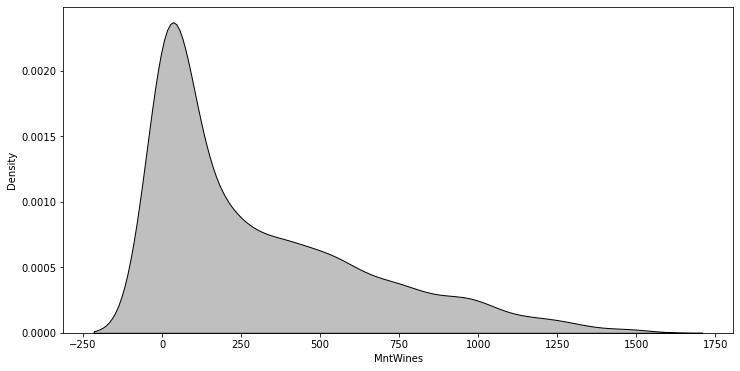

In [79]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='MntWines',data=df,fill=True,color='black');

In [80]:
df['Total_Spend'] = (df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])

In [81]:
df['Total_Spend'].describe()

count    2229.000000
mean      606.093764
std       602.313230
min         5.000000
25%        69.000000
50%       396.000000
75%      1045.000000
max      2525.000000
Name: Total_Spend, dtype: float64

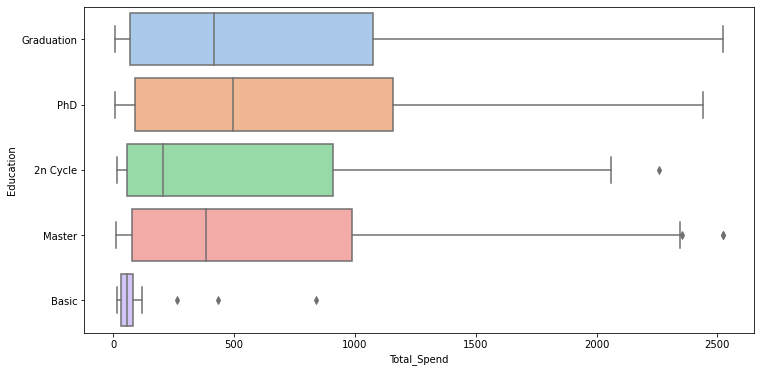

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Spend',y='Education',data=df,palette=colors);

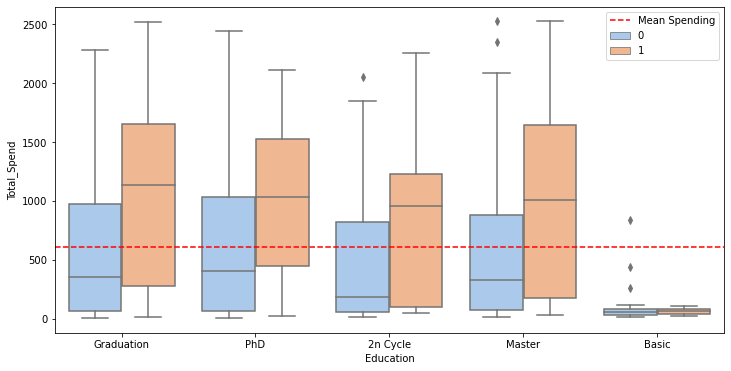

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education',y='Total_Spend',data=df,hue='Response',palette=colors)
plt.axhline(df['Total_Spend'].mean(), linestyle='--', color='red',label='Mean Spending')
plt.legend();

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


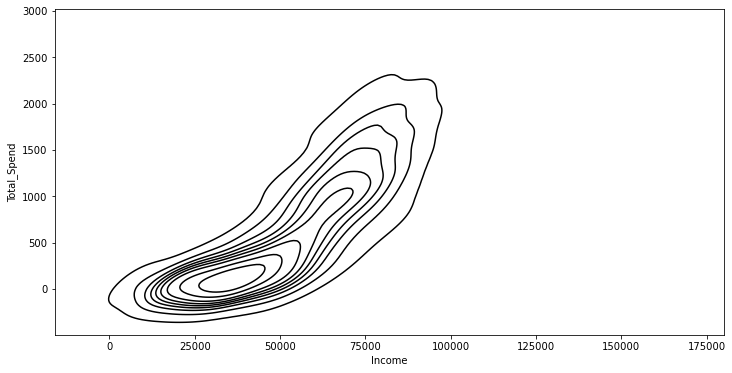

In [84]:
plt.figure(figsize=(12,6))
sns.kdeplot('Income','Total_Spend',data=df,color='black');

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


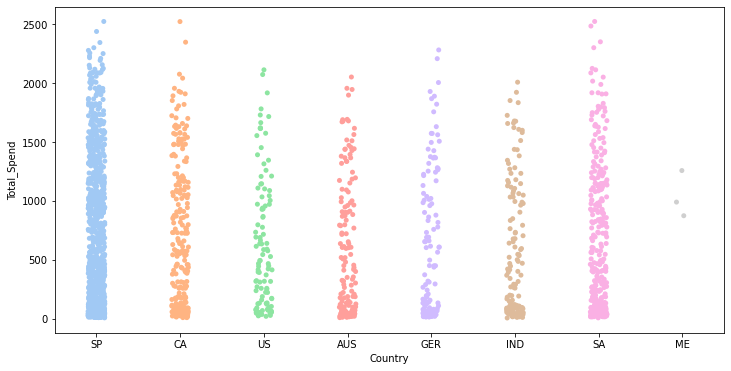

In [85]:
plt.figure(figsize=(12,6))
sns.stripplot('Country','Total_Spend',data=df,palette=colors,);

**Total Purchase Value**

In [86]:
df1 = df[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
df1.head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1,4,4,6
1,1,7,3,7
2,1,3,2,5
3,1,1,0,2
4,2,3,1,2


In [87]:
df1.agg(['sum','mean','min','max'])

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
sum,5176.000000,9104.000000,5936.000000,12922.000000
mean,2.322118,4.084343,2.663078,5.797218
min,0.000000,0.000000,0.000000,0.000000
max,15.000000,27.000000,28.000000,13.000000


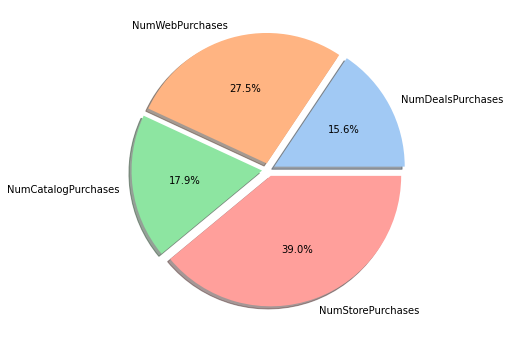

In [88]:
value = df1.sum()
response = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(12,6))
explode = (0.05,0.05,0.05,0.05)
plt.pie(x=value,labels=response,autopct="%0.1f%%",colors=colors,shadow=True,explode=explode);

In [89]:
df.groupby('NumStorePurchases').mean()['MntGoldProds']

NumStorePurchases
0     47.666667
1     85.857143
2     14.790909
3     15.247444
4     33.517134
5     55.278302
6     58.327586
7     56.154930
8     68.818792
9     70.933962
10    60.440000
11    70.012346
12    76.371429
13    73.831325
Name: MntGoldProds, dtype: float64

In [90]:
df['Total_Purchase'] = (df['NumDealsPurchases']+df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases'])

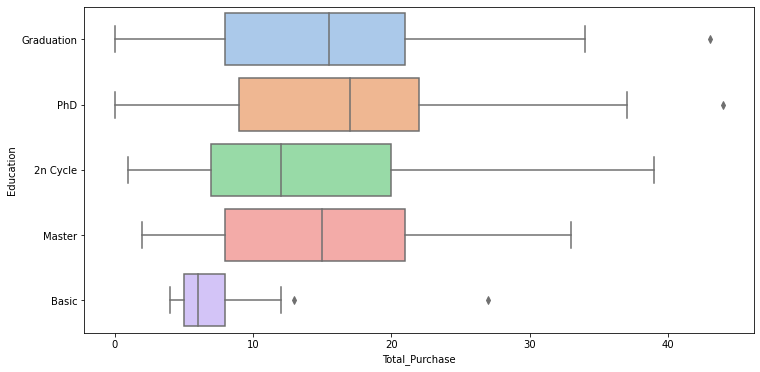

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Purchase',y='Education',data=df,palette=colors);

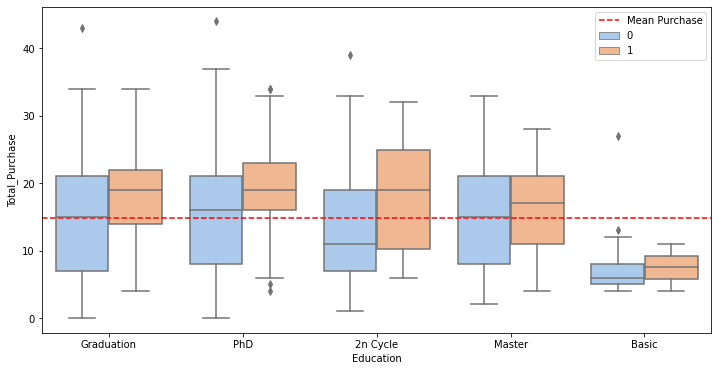

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education',y='Total_Purchase',data=df,hue='Response',palette=colors)
plt.axhline(df['Total_Purchase'].mean(), linestyle='--', color='red',label='Mean Purchase')
plt.legend();

In [93]:
#drop country outliers

df.index[df['Country'] == "US"] & df.index[df['Total_Purchase']>40]
df.drop(df.index[df['Country'] == "US"] & df.index[df['Total_Purchase']>40],axis=0,inplace=True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


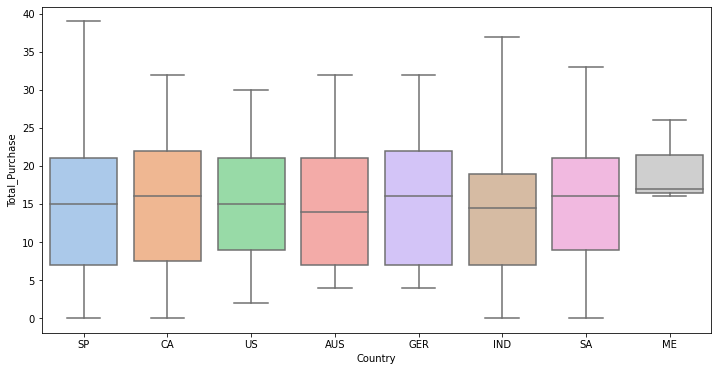

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot('Country','Total_Purchase',data=df,palette=colors);

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


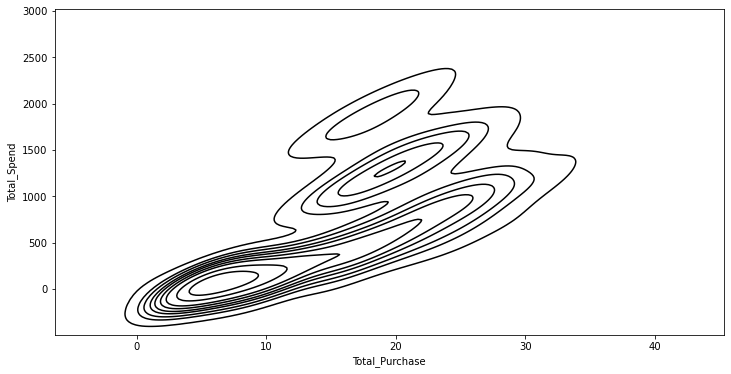

In [95]:
plt.figure(figsize=(12,6))
sns.kdeplot('Total_Purchase','Total_Spend',data=df,colors='black');

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


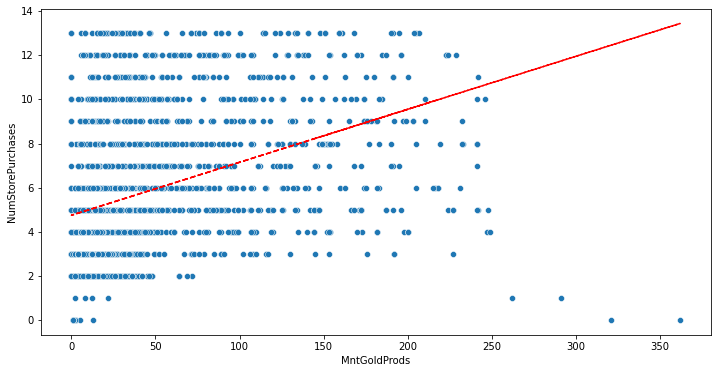

In [96]:
data = df[['MntGoldProds', 'NumStorePurchases']]
x = df['MntGoldProds']
y = df['NumStorePurchases']
plt.figure(figsize=(12,6))
sns.scatterplot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [97]:
from scipy import stats

tau, p_value = stats.kendalltau(df['MntGoldProds'], df['NumStorePurchases'])

p_value

7.783691073632773e-151

**Complain**

In [98]:
df["Complain"].value_counts()

0    2207
1      20
Name: Complain, dtype: int64

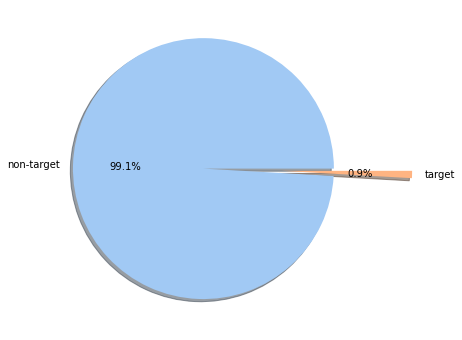

In [99]:
value = df["Complain"].value_counts()
response = ["non-target","target"]

plt.figure(figsize=(12,6))
explode = (0.3,0.3)
plt.pie(x=value,labels=response,autopct="%0.1f%%",explode=explode,colors=colors,shadow=True);

**Campaign**

In [100]:
df1 = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']]
df1

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,0,0,0
2237,0,0,0,0,0,0
2238,0,0,0,0,0,0


In [101]:
df1.apply(pd.value_counts)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,2084,2197,2065,2060,2066,1896
1,143,30,162,167,161,331


In [102]:
df1.apply(pd.value_counts)/len(df1)*100

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,93.578806,98.652896,92.72564,92.501123,92.770543,85.136956
1,6.421194,1.347104,7.27436,7.498877,7.229457,14.863044


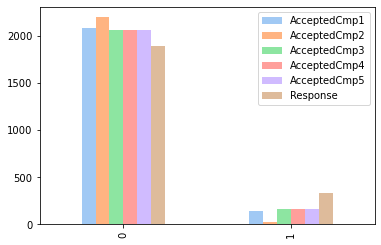

In [103]:
df1.apply(pd.value_counts).plot(kind='bar',color = colors);

In [104]:
df.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Country,Income,Month,Year,Day,Day_of_Week,Age_Range,Total_Spend,Total_Purchase
0,Graduation,Divorced,0,0,0,189,104,379,111,189,...,0,SP,84835.0,Jun,2014,16,Mon,50-59,1190,15
1,Graduation,Single,0,0,0,464,5,64,7,0,...,0,CA,57091.0,Jun,2014,15,Sun,60-69,577,18
2,Graduation,Married,0,1,0,134,11,59,15,2,...,0,US,67267.0,May,2014,13,Tue,60-69,251,11
3,Graduation,Together,1,1,0,10,0,1,0,0,...,0,AUS,32474.0,May,2014,11,Sun,50-59,11,4
4,Graduation,Single,1,0,0,6,16,24,11,0,...,0,SP,21474.0,Apr,2014,8,Tue,30-39,91,8


In [105]:
df.to_csv("market_analysis_clean_data.csv",index=False)